## BSAN6070 CA-01 <br> Housing Predictions 
#### Tina Brauneck<br>1/25/2025

Description: This code contains a data quality report and data exploration for the housing price dataset.<br><br><br>

#### Table of Contents
##### &emsp; Step 1: Generating an Analytics Base Table (ABT)

##### &emsp; Step 2: Assessing Data Quality

&emsp; &emsp; &emsp; 2A. Data Quality Report: Continuous Features <br>
&emsp; &emsp; &emsp; 2B. Data Quality Report: Categorical Features <br>
&emsp; &emsp; &emsp; 2C. Dropping Low-Quality Features <br>
&emsp; &emsp; &emsp; 2D. Cardinality Checks <br>

##### &emsp; Step 3: Data Exploration

&emsp; &emsp; &emsp; 3A. Data Distribution <br>
&emsp; &emsp; &emsp; &emsp; Histograms <br>
&emsp; &emsp; &emsp; &emsp; Bar Charts <br>
&emsp; &emsp; &emsp; 3B. Feature/Target Relationships <br>
&emsp; &emsp; &emsp; &emsp; Scatterplot Matrix <br>
&emsp; &emsp; &emsp; &emsp; Correlation Matrix <br>

##### &emsp; Step 4: Data Preparation

&emsp; &emsp; &emsp; &emsp; 4A. Imputations and Calculations <br>
&emsp; &emsp; &emsp; &emsp; 4B. Dropping Features<br>
&emsp; &emsp; &emsp; &emsp; 4C. Encoding<br>
&emsp; &emsp; &emsp; &emsp; 4D. Outlier Handing <br>
&emsp; &emsp; &emsp; &emsp; &emsp; Dropping Rows <br>
&emsp; &emsp; &emsp; &emsp; 4E. Transformations<br>

 <br><br>

### Step 1: Generating an Analytics Base Table (ABT)

In [16]:
# This step puts our data into a dataframe and provides a first look at the data.

In [17]:
# Optional working directory set up. Change the path and uncomment lines below to change the working directory.
#import os
#os.chdir(r"C:\Users\ttesn\OneDrive\Documents\MSBA\BSAN 6070\Computer Assignments\CA-01")
#print(os.getcwd()) 

In [18]:
# Optional install. Uncomment and install if not already installed
# pip install plotnine pandas
# pip install plotly

In [19]:
#Package imports
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
from plotnine.data import mpg

In [20]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/refs/heads/main/CA01/house-price-train.csv") # read in the data

In [21]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(1460, 81)


In [22]:
df.head() #preview the data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [23]:
df.tail() #preview the data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

### Step 2: Assessing Data Quality

In [25]:
# This function determines if the feature is categorial or numerical

In [26]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [27]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [28]:
pd.set_option('display.width', 1000)

In [29]:
# This function generates a Data Quality Report

def data_quality_report(df, report_type):
    continuous_report = pd.DataFrame(columns=[
        'Feature', 'Count', '% Missing', 'Card.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max', 'Std. Dev.'
    ])

    categorical_report = pd.DataFrame(columns=[
        'Feature', 'Count', '% Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'
    ])
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            first_quartile = df[col].quantile(0.25)
            mean = df[col].mean()
            median = df[col].median()
            third_quartile = df[col].quantile(0.75)
            max_value = df[col].max()
            std_dev = df[col].std()
            
            continuous_report = pd.concat([continuous_report, pd.DataFrame([{
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                '1st Qrt.': first_quartile,
                'Mean': mean,
                'Median': median,
                '3rd Qrt.': third_quartile,
                'Max': max_value,
                'Std. Dev.': std_dev
            }])], ignore_index=True)

        else:
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            mode = df[col].mode()
            mode_freq = df[col].value_counts().iloc[0]
            mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
            second_mode = mode[1] if len(mode) > 1 else None
            second_mode_freq = df[col].value_counts().iloc[1] if len(mode) > 1 else None
            second_mode_percentage = (second_mode_freq / count) * 100 if second_mode_freq is not None else 0

            categorical_report = pd.concat([categorical_report, pd.DataFrame([{
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                'Mode': mode,
                'Mode Freq.': mode_freq,
                'Mode %': mode_percentage,
                '2nd Mode': second_mode,
                '2nd Mode Freq.': second_mode_freq,
                '2nd Mode %': second_mode_percentage
            }])],ignore_index=True)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        print("error: report type options are cat or cont")
        
   # print("Continuous Report")
   # print(" ")
   # print("Categorical Report")
    #return continuous_report, categorical_report

In [30]:
dqr_cont = data_quality_report(df,"cont")

C:\Users\ttesn\AppData\Local\Temp\ipykernel_37408\255265783.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
C:\Users\ttesn\AppData\Local\Temp\ipykernel_37408\255265783.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [31]:
dqr_cat = data_quality_report(df,"cat")

C:\Users\ttesn\AppData\Local\Temp\ipykernel_37408\255265783.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
C:\Users\ttesn\AppData\Local\Temp\ipykernel_37408\255265783.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


#### 2A. Data Quality Report: Continuous Features

In [511]:
dqr_cont

Feature Count  % Missing Card.   1st Qrt.           Mean    Median   3rd Qrt.     Max     Std. Dev.
0              Id  1460   0.000000  1460     365.75     730.500000     730.5    1095.25    1460    421.610009
1      MSSubClass  1460   0.000000    15      20.00      56.897260      50.0      70.00     190     42.300571
2     LotFrontage  1201  17.739726   110      59.00      70.049958      69.0      80.00   313.0     24.284752
3         LotArea  1460   0.000000  1073    7553.50   10516.828082    9478.5   11601.50  215245   9981.264932
4     OverallQual  1460   0.000000    10       5.00       6.099315       6.0       7.00      10      1.382997
5     OverallCond  1460   0.000000     9       5.00       5.575342       5.0       6.00       9      1.112799
6       YearBuilt  1460   0.000000   112    1954.00    1971.267808    1973.0    2000.00    2010     30.202904
7    YearRemodAdd  1460   0.000000    61    1967.00    1984.865753    1994.0    2004.00    2010     20.645407
8      MasVnrArea  1452   0.547945   327       0.00     103.685262       0.0     166.00  1600.0    181.066207
9      BsmtFinSF1  1460   0.000000   637       0.00     443.639726     383.5     712.25    5644    456.098091
10     BsmtFinSF2  1460   0.000000   144       0.00      46.549315       0.0       0.00    1474    161.319273
11      BsmtUnfSF  1460   0.000000   780     223.00     567.240411     477.5     808.00    2336    441.866955
12    TotalBsmtSF  1460   0.000000   721     795.75    1057.429452     991.5    1298.25    6110    438.705324
13       1stFlrSF  1460   0.000000   753     882.00    1162.626712    1087.0    1391.25    4692    386.587738
14       2ndFlrSF  1460   0.000000   417       0.00     346.992466       0.0     728.00    2065    436.528436
15   LowQualFinSF  1460   0.000000    24       0.00       5.844521       0.0       0.00     572     48.623081
16      GrLivArea  1460   0.000000   861    1129.50    1515.463699    1464.0    1776.75    5642    525.480383
17   BsmtFullBath  1460   0.000000     4       0.00       0.425342       0.0       1.00       3      0.518911
18   BsmtHalfBath  1460   0.000000     3       0.00       0.057534       0.0       0.00       2      0.238753
19       FullBath  1460   0.000000     4       1.00       1.565068       2.0       2.00       3      0.550916
20       HalfBath  1460   0.000000     3       0.00       0.382877       0.0       1.00       2      0.502885
21   BedroomAbvGr  1460   0.000000     8       2.00       2.866438       3.0       3.00       8      0.815778
22   KitchenAbvGr  1460   0.000000     4       1.00       1.046575       1.0       1.00       3      0.220338
23   TotRmsAbvGrd  1460   0.000000    12       5.00       6.517808       6.0       7.00      14      1.625393
24     Fireplaces  1460   0.000000     4       0.00       0.613014       1.0       1.00       3      0.644666
25    GarageYrBlt  1379   5.547945    97    1961.00    1978.506164    1980.0    2002.00  2010.0     24.689725
26     GarageCars  1460   0.000000     5       1.00       1.767123       2.0       2.00       4      0.747315
27     GarageArea  1460   0.000000   441     334.50     472.980137     480.0     576.00    1418    213.804841
28     WoodDeckSF  1460   0.000000   274       0.00      94.244521       0.0     168.00     857    125.338794
29    OpenPorchSF  1460   0.000000   202       0.00      46.660274      25.0      68.00     547     66.256028
30  EnclosedPorch  1460   0.000000   120       0.00      21.954110       0.0       0.00     552     61.119149
31      3SsnPorch  1460   0.000000    20       0.00       3.409589       0.0       0.00     508     29.317331
32    ScreenPorch  1460   0.000000    76       0.00      15.060959       0.0       0.00     480     55.757415
33       PoolArea  1460   0.000000     8       0.00       2.758904       0.0       0.00     738     40.177307
34        MiscVal  1460   0.000000    21       0.00      43.489041       0.0       0.00   15500    496.123024
35         MoSold  1460   0.000000    12       5.0

#### 2B. Data Quality Report: Categorical Features

In [48]:
dqr_cat

Feature Count  % Missing Card.                                            Mode Mode Freq.     Mode % 2nd Mode 2nd Mode Freq. 2nd Mode %
0        MSZoning  1460   0.000000     5           0    RL
Name: MSZoning, dtype: object       1151  78.835616     None           None          0
1          Street  1460   0.000000     2           0    Pave
Name: Street, dtype: object       1454  99.589041     None           None          0
2           Alley    91  93.767123     2            0    Grvl
Name: Alley, dtype: object         50  54.945055     None           None          0
3        LotShape  1460   0.000000     4          0    Reg
Name: LotShape, dtype: object        925  63.356164     None           None          0
4     LandContour  1460   0.000000     4       0    Lvl
Name: LandContour, dtype: object       1311  89.794521     None           None          0
5       Utilities  1460   0.000000     2      0    AllPub
Name: Utilities, dtype: object       1459  99.931507     None           None          0
6       LotConfig  1460   0.000000     5      0    Inside
Name: LotConfig, dtype: object       1052  72.054795     None           None          0
7       LandSlope  1460   0.000000     3         0    Gtl
Name: LandSlope, dtype: object       1382  94.657534     None           None          0
8    Neighborhood  1460   0.000000    25    0    NAmes
Name: Neighborhood, dtype: object        225  15.410959     None           None          0
9      Condition1  1460   0.000000     9       0    Norm
Name: Condition1, dtype: object       1260  86.301370     None           None          0
10     Condition2  1460   0.000000     8       0    Norm
Name: Condition2, dtype: object       1445  98.972603     None           None          0
11       BldgType  1460   0.000000     5         0    1Fam
Name: BldgType, dtype: object       1220  83.561644     None           None          0
12     HouseStyle  1460   0.000000     8     0    1Story
Name: HouseStyle, dtype: object        726  49.726027     None           None          0
13      RoofStyle  1460   0.000000     6       0    Gable
Name: RoofStyle, dtype: object       1141  78.150685     None           None          0
14       RoofMatl  1460   0.000000     8      0    CompShg
Name: RoofMatl, dtype: object       1434  98.219178     None           None          0
15    Exterior1st  1460   0.000000    15   0    VinylSd
Name: Exterior1st, dtype: object        515  35.273973     None           None          0
16    Exterior2nd  1460   0.000000    16   0    VinylSd
Name: Exterior2nd, dtype: object        504  34.520548     None           None          0
17     MasVnrType   588  59.726027     3    0    BrkFace
Name: MasVnrType, dtype: object        445  75.680272     None           None          0
18      ExterQual  1460   0.000000     4          0    TA
Name: ExterQual, dtype: object        906  62.054795     None           None          0
19      ExterCond  1460   0.000000     5          0    TA
Name: ExterCond, dtype: object       1282  87.808219     None           None          0
20     Foundation  1460   0.000000     6      0    PConc
Name: Foundation, dtype: object        647  44.315068     None           None          0
21       BsmtQual  1423   2.534247     4           0    TA
Name: BsmtQual, dtype: object        649  45.607871     None           None          0
22       BsmtCond  1423   2.534247     4           0    TA
Name: BsmtCond, dtype: object       1311  92.129304     None           None          0
23   BsmtExposure  1422   2.602740     4       0    No
Name: BsmtExposure, dtype: object        953  67.018284     None           None          0
24   BsmtFinType1  1423   2.534247     6      0    Unf
Name: BsmtFinType1, dtype: object        430  30.217850     None           None          0
25   BsmtFinType2  1422   2.602740     6      0    Unf
Name: BsmtFinType2, dtype: object       1256  88.326301     None           None          0
26        Heating  1460   0.000000     6          0    GasA
Name: He

#### 2C. Dropping Low-Quality Features

In [515]:
dqr_cat[dqr_cat['% Missing'] > 60]

Feature Count  % Missing Card.                                        Mode Mode Freq. Mode % 2nd Mode 2nd Mode Freq. 2nd Mode %
2         Alley    91  93.767123     2        0    Grvl
Name: Alley, dtype: object        NaN    NaN      NaN            NaN        NaN
38       PoolQC     7  99.520548     3         0    Gd
Name: PoolQC, dtype: object        NaN    NaN      NaN            NaN        NaN
39        Fence   281  80.753425     4       0    MnPrv
Name: Fence, dtype: object        NaN    NaN      NaN            NaN        NaN
40  MiscFeature    54  96.301370     4  0    Shed
Name: MiscFeature, dtype: object        NaN    NaN      NaN            NaN        NaN

In [516]:
dqr_cont[dqr_cont['% Missing'] > 60]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., 1st Qrt., Mean, Median, 3rd Qrt., Max, Std. Dev.]
Index: []

In [517]:
abt = df.drop(['Id'], axis=1, inplace=False)

In [518]:
# Four categorical feautres are missing values in more than 60% of their observations. We may drop these four categorical features.
# All continuous features have at least 60% of their values present.
# We can drop the ID column. 

#### 2D. Cardinality Checks

If a feature has cardinality of 1, we drop it, because it is no use; all the values are the same.

In [521]:
dqr_cat[dqr_cat['Card.'] == 1]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., Mode, Mode Freq., Mode %, 2nd Mode, 2nd Mode Freq., 2nd Mode %]
Index: []

In [522]:
dqr_cont[dqr_cont['Card.'] == 1]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., 1st Qrt., Mean, Median, 3rd Qrt., Max, Std. Dev.]
Index: []

In [523]:
# No features have a cardinality of 1.

In [524]:
# Checking for categorical features that have too high a cardinality. These may just be unique identifiers and can be dropped.
dqr_cat[dqr_cat['Card.'] > 50]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., Mode, Mode Freq., Mode %, 2nd Mode, 2nd Mode Freq., 2nd Mode %]
Index: []

In [525]:
# Checking for continuous features that have too low a cardinality. These may actually be encoded categorical features.
dqr_cont[dqr_cont['Card.'] < 30]

Feature Count  % Missing Card.  1st Qrt.         Mean  Median  3rd Qrt.    Max   Std. Dev.
1     MSSubClass  1460        0.0    15      20.0    56.897260    50.0      70.0    190   42.300571
4    OverallQual  1460        0.0    10       5.0     6.099315     6.0       7.0     10    1.382997
5    OverallCond  1460        0.0     9       5.0     5.575342     5.0       6.0      9    1.112799
15  LowQualFinSF  1460        0.0    24       0.0     5.844521     0.0       0.0    572   48.623081
17  BsmtFullBath  1460        0.0     4       0.0     0.425342     0.0       1.0      3    0.518911
18  BsmtHalfBath  1460        0.0     3       0.0     0.057534     0.0       0.0      2    0.238753
19      FullBath  1460        0.0     4       1.0     1.565068     2.0       2.0      3    0.550916
20      HalfBath  1460        0.0     3       0.0     0.382877     0.0       1.0      2    0.502885
21  BedroomAbvGr  1460        0.0     8       2.0     2.866438     3.0       3.0      8    0.815778
22  KitchenAbvGr  1460        0.0     4       1.0     1.046575     1.0       1.0      3    0.220338
23  TotRmsAbvGrd  1460        0.0    12       5.0     6.517808     6.0       7.0     14    1.625393
24    Fireplaces  1460        0.0     4       0.0     0.613014     1.0       1.0      3    0.644666
26    GarageCars  1460        0.0     5       1.0     1.767123     2.0       2.0      4    0.747315
31     3SsnPorch  1460        0.0    20       0.0     3.409589     0.0       0.0    508   29.317331
33      PoolArea  1460        0.0     8       0.0     2.758904     0.0       0.0    738   40.177307
34       MiscVal  1460        0.0    21       0.0    43.489041     0.0       0.0  15500  496.123024
35        MoSold  1460        0.0    12       5.0     6.321918     6.0       8.0     12    2.703626
36        YrSold  1460        0.0     5    2007.0  2007.815753  2008.0    2009.0   2010    1.328095

### Step 3: Data Exploration

To start exploring, we divide the ABT dataframe into two feature sets: continuous features and categorical features.

In [528]:
# Declare empty lists for the categorical columns and the continuous columns
categorical_cols = []
continuous_cols = []

for col in abt.columns:
    if pd.api.types.is_numeric_dtype(abt[col]):
        continuous_cols.append(col)
    else:
        categorical_cols.append(col)

In [529]:
abt[categorical_cols].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ         NaN     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y    NaN   NaN         NaN       WD       Abnorml
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal

In [530]:
abt[continuous_cols].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000

#### 3A. Data Distribution

Histograms

In [533]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, element_text, theme_classic

# Melt the DataFrame to long format
abt_cont_melted = abt[continuous_cols].melt(var_name='column', value_name='value')

# Create the plot
p = (ggplot(abt_cont_melted, aes(x='value')) +
    geom_histogram(bins=30, fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=10, ncol=4, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(subplots_adjust={'wspace': 0.25},  # Adjust the width space between plots
        figure_size=(24, 36),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=18),
        axis_text=element_text(size=16),  # Increase axis text size
        #axis_title=element_text(size=40),  # Option to increase axis title size
        #plot_title=element_text(size=36)  # Option to increase plot title size
                 ))


C:\Users\ttesn\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning:

stat_bin : Removed 348 rows containing non-finite values.

C:\Users\ttesn\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning:

You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.



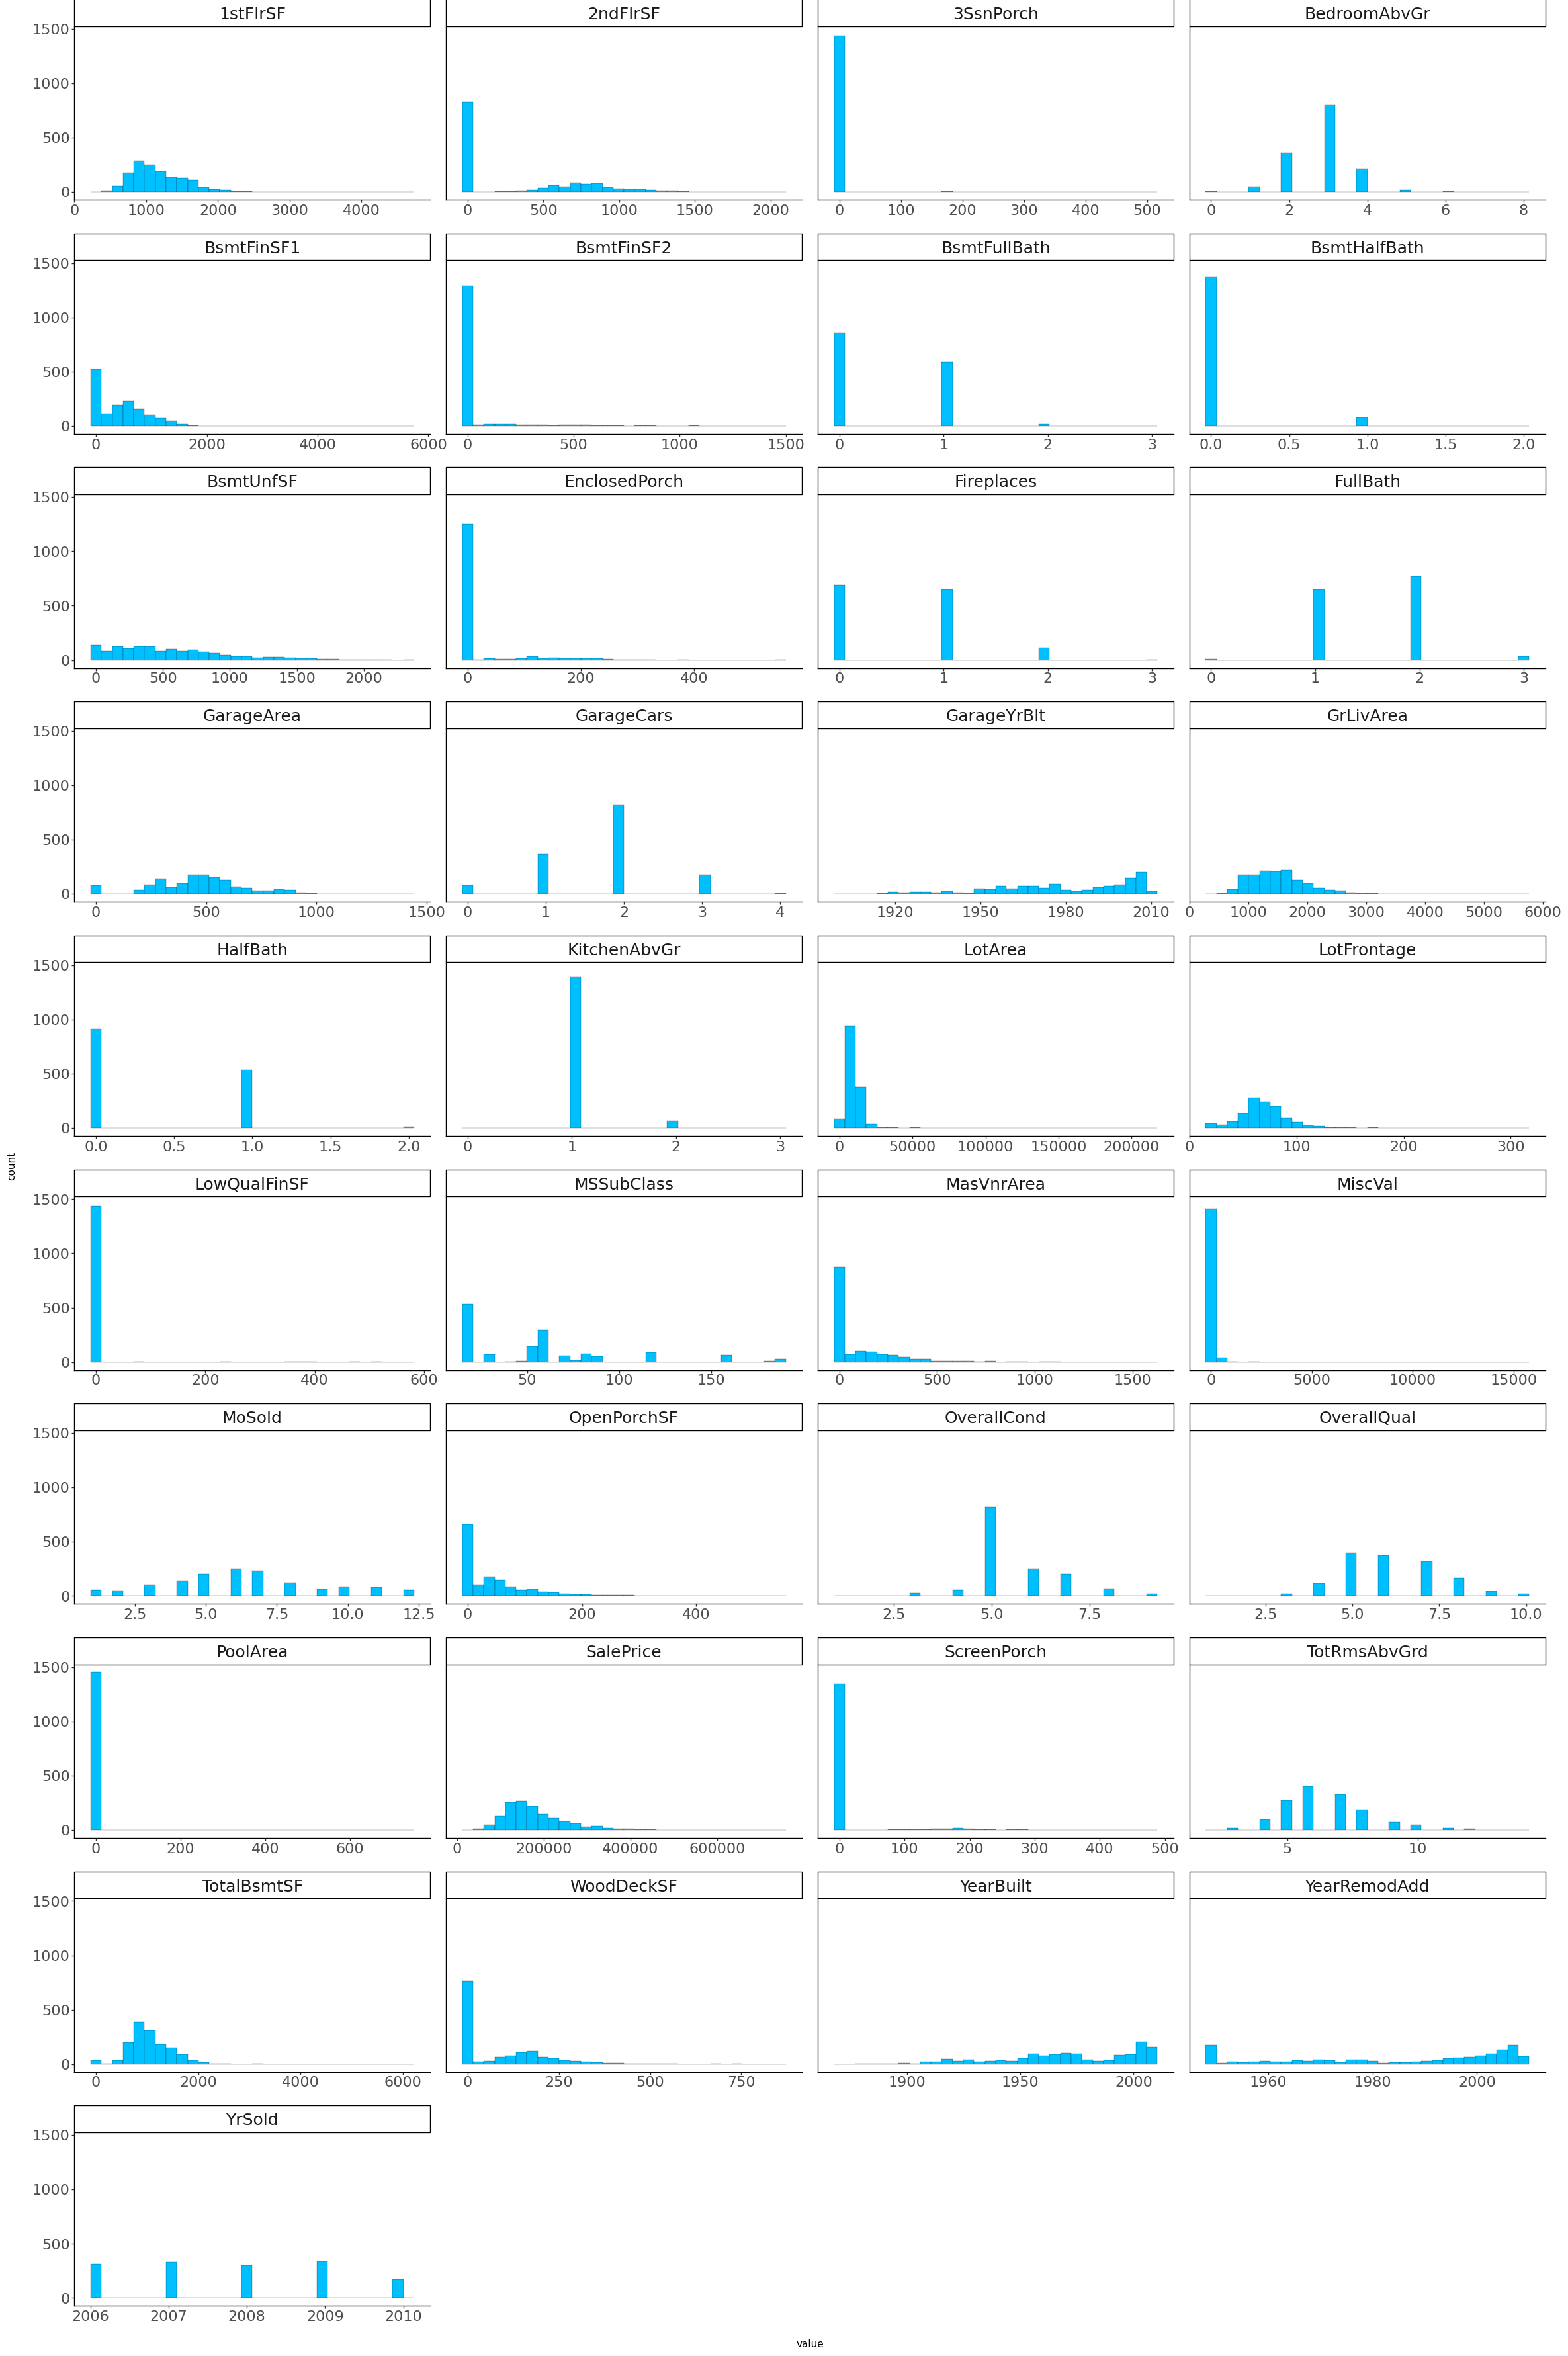

In [534]:
p.draw()

Bar Plots

In [536]:
abt_cat_melted = abt[categorical_cols].melt(var_name='column', value_name='value')

p = (ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=4, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(subplots_adjust={'wspace': 0.25},  # Adjust the width space between plots
        figure_size=(24, 36),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=18),
        axis_text=element_text(size=16),  # Increase axis text size
        #axis_title=element_text(size=40),  # Option to increase axis title size
        #plot_title=element_text(size=36)  # Option to increase plot title size
                 ))


C:\Users\ttesn\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning:

You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.



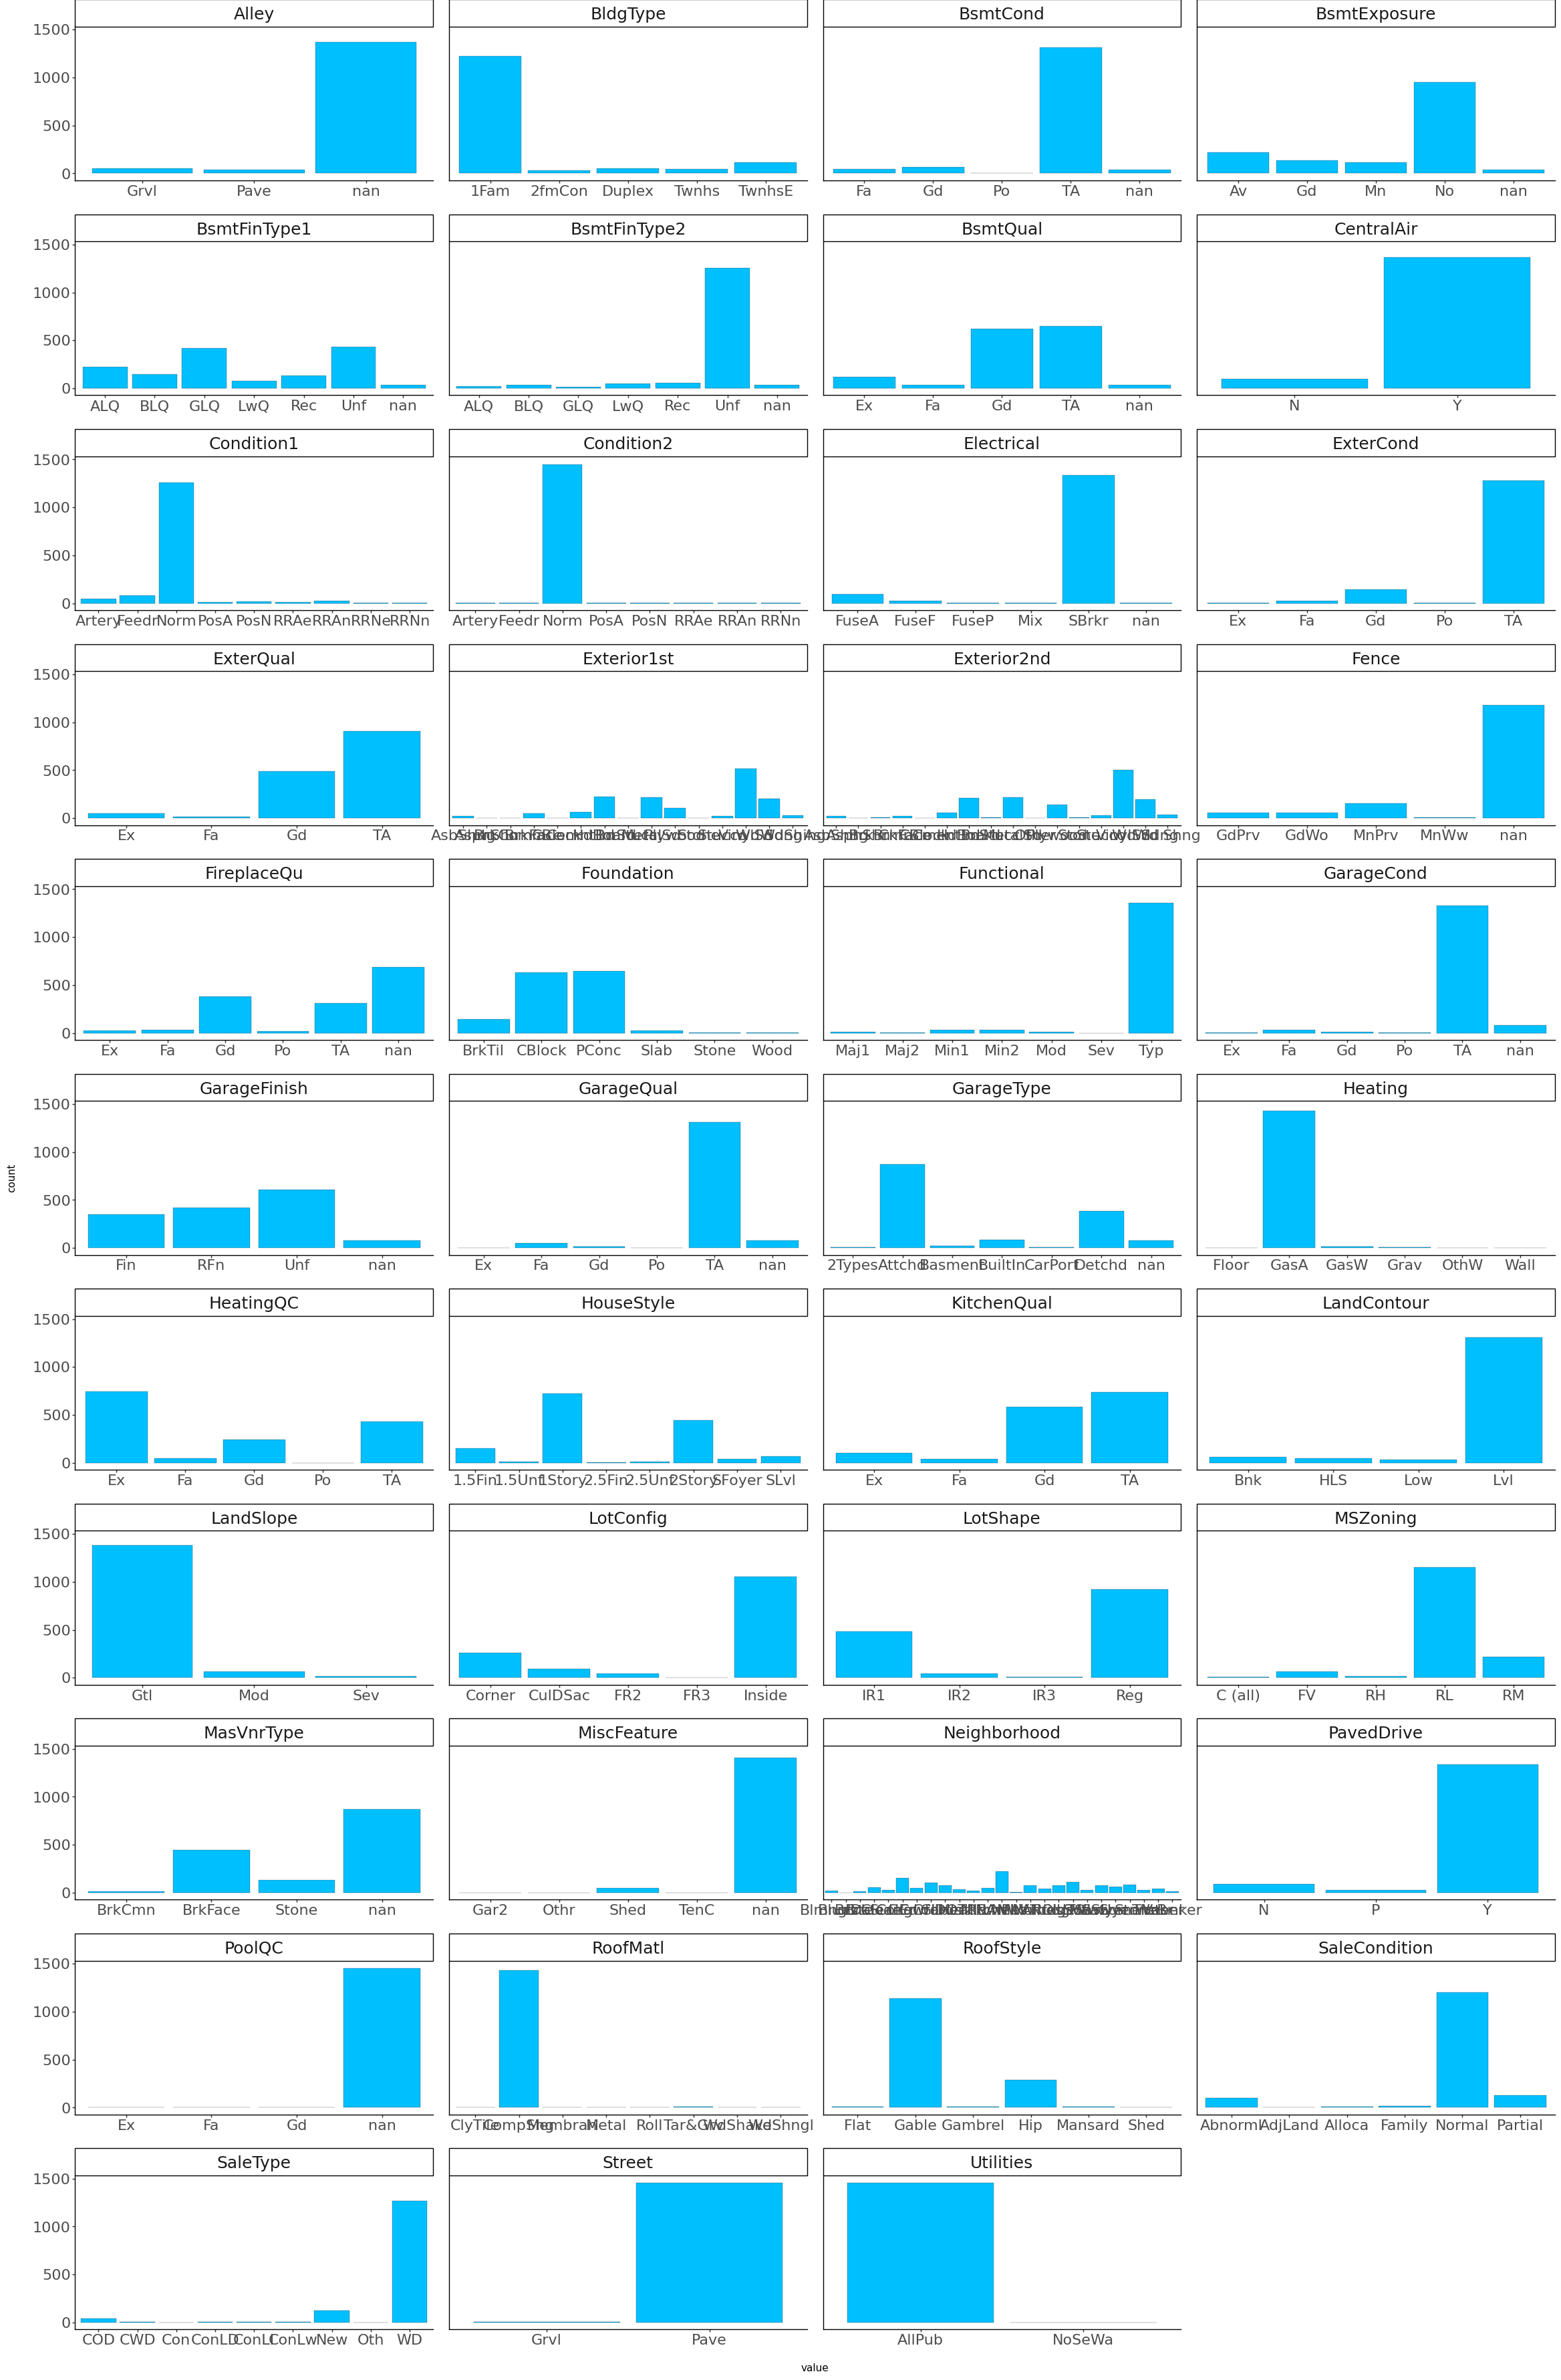

In [537]:
p.draw()

#### 3B. Feature Relationships

Scatter Plot Matrix

In [540]:
## create a pairplot to visualize the relationships between multiple numeric columns
#sns.pairplot(abt[continuous_cols])

In [541]:
plt.show()

In [542]:
# The scatterplot matrix has too many plots to read, so we will remove the features with low cardinality.
continuous_high_card = []
low_card = []

for col in abt.columns:
    if pd.api.types.is_numeric_dtype(abt[col]) and abt[col].nunique() > 15 :
        continuous_high_card.append(col)
    else:
        low_card.append(col)

In [543]:
abt[continuous_high_card].head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice
0         65.0     8450       2003          2003       196.0         706           0        150          856       856       854             0       1710       2003.0         548           0           61              0          0            0        0     208500
1         80.0     9600       1976          1976         0.0         978           0        284         1262      1262         0             0       1262       1976.0         460         298            0              0          0            0        0     181500
2         68.0    11250       2001          2002       162.0         486           0        434          920       920       866             0       1786       2001.0         608           0           42              0          0            0        0     223500
3         60.0     9550       1915          1970         0.0         216           0        540          756       961       756             0       1717       1998.0         642           0           35            272          0            0        0     140000
4         84.0    14260       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198       2000.0         836         192           84              0          0            0        0     250000

In [544]:
sns.pairplot(abt[continuous_high_card])

In [545]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns
import pandas as pd

pd.DataFrame.iteritems = pd.DataFrame.items
# Load a sample dataset

# Create the scatterplot matrix
fig_matrix = px.scatter_matrix(abt[continuous_high_card], dimensions=abt[continuous_high_card].columns[:-1])

fig_matrix.update_layout(
    autosize=False,
    width=1000,
    height=1000
)

In [546]:
# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='scatter-matrix', figure=fig_matrix),
    dcc.Graph(id='zoomed-scatter', style={'display': 'none'})
])

@app.callback(
    Output('zoomed-scatter', 'figure'),
    Output('zoomed-scatter', 'style'),
    Input('scatter-matrix', 'clickData')
)
def display_zoomed_scatter(clickData):
    if clickData is None:
        return {}, {'display': 'none'}
    
    point = clickData['points'][0]
    x_col = point['x']
    y_col = point['y']
    
    fig_zoomed = px.scatter(df, x=x_col, y=y_col)
    return fig_zoomed, {'display': 'block'}

if __name__ == '__main__':
    app.run_server(debug=True, port=8052)  # Change the port number to an available one

In [547]:
# This option is interactive. While the labels are had to read when there are too many plots, you can hover over the plots
# to see the values and labels. This tells you which features you are comparing, so you can easily identify the features with high
# correlation.

# Features that exhibit multicollinearilty are:
# BsmtFin SF1 and TotalBsmtSF
# BsmtUnfSF and TotalBsmtSF
# 1stFlSF and TotalBsmtSF
# 1stFlSF and GrLivArea
# 2ndFlSF and GrLivArea

Correlation Matrix

In [549]:
correlation_matrix = abt[continuous_cols].corr()

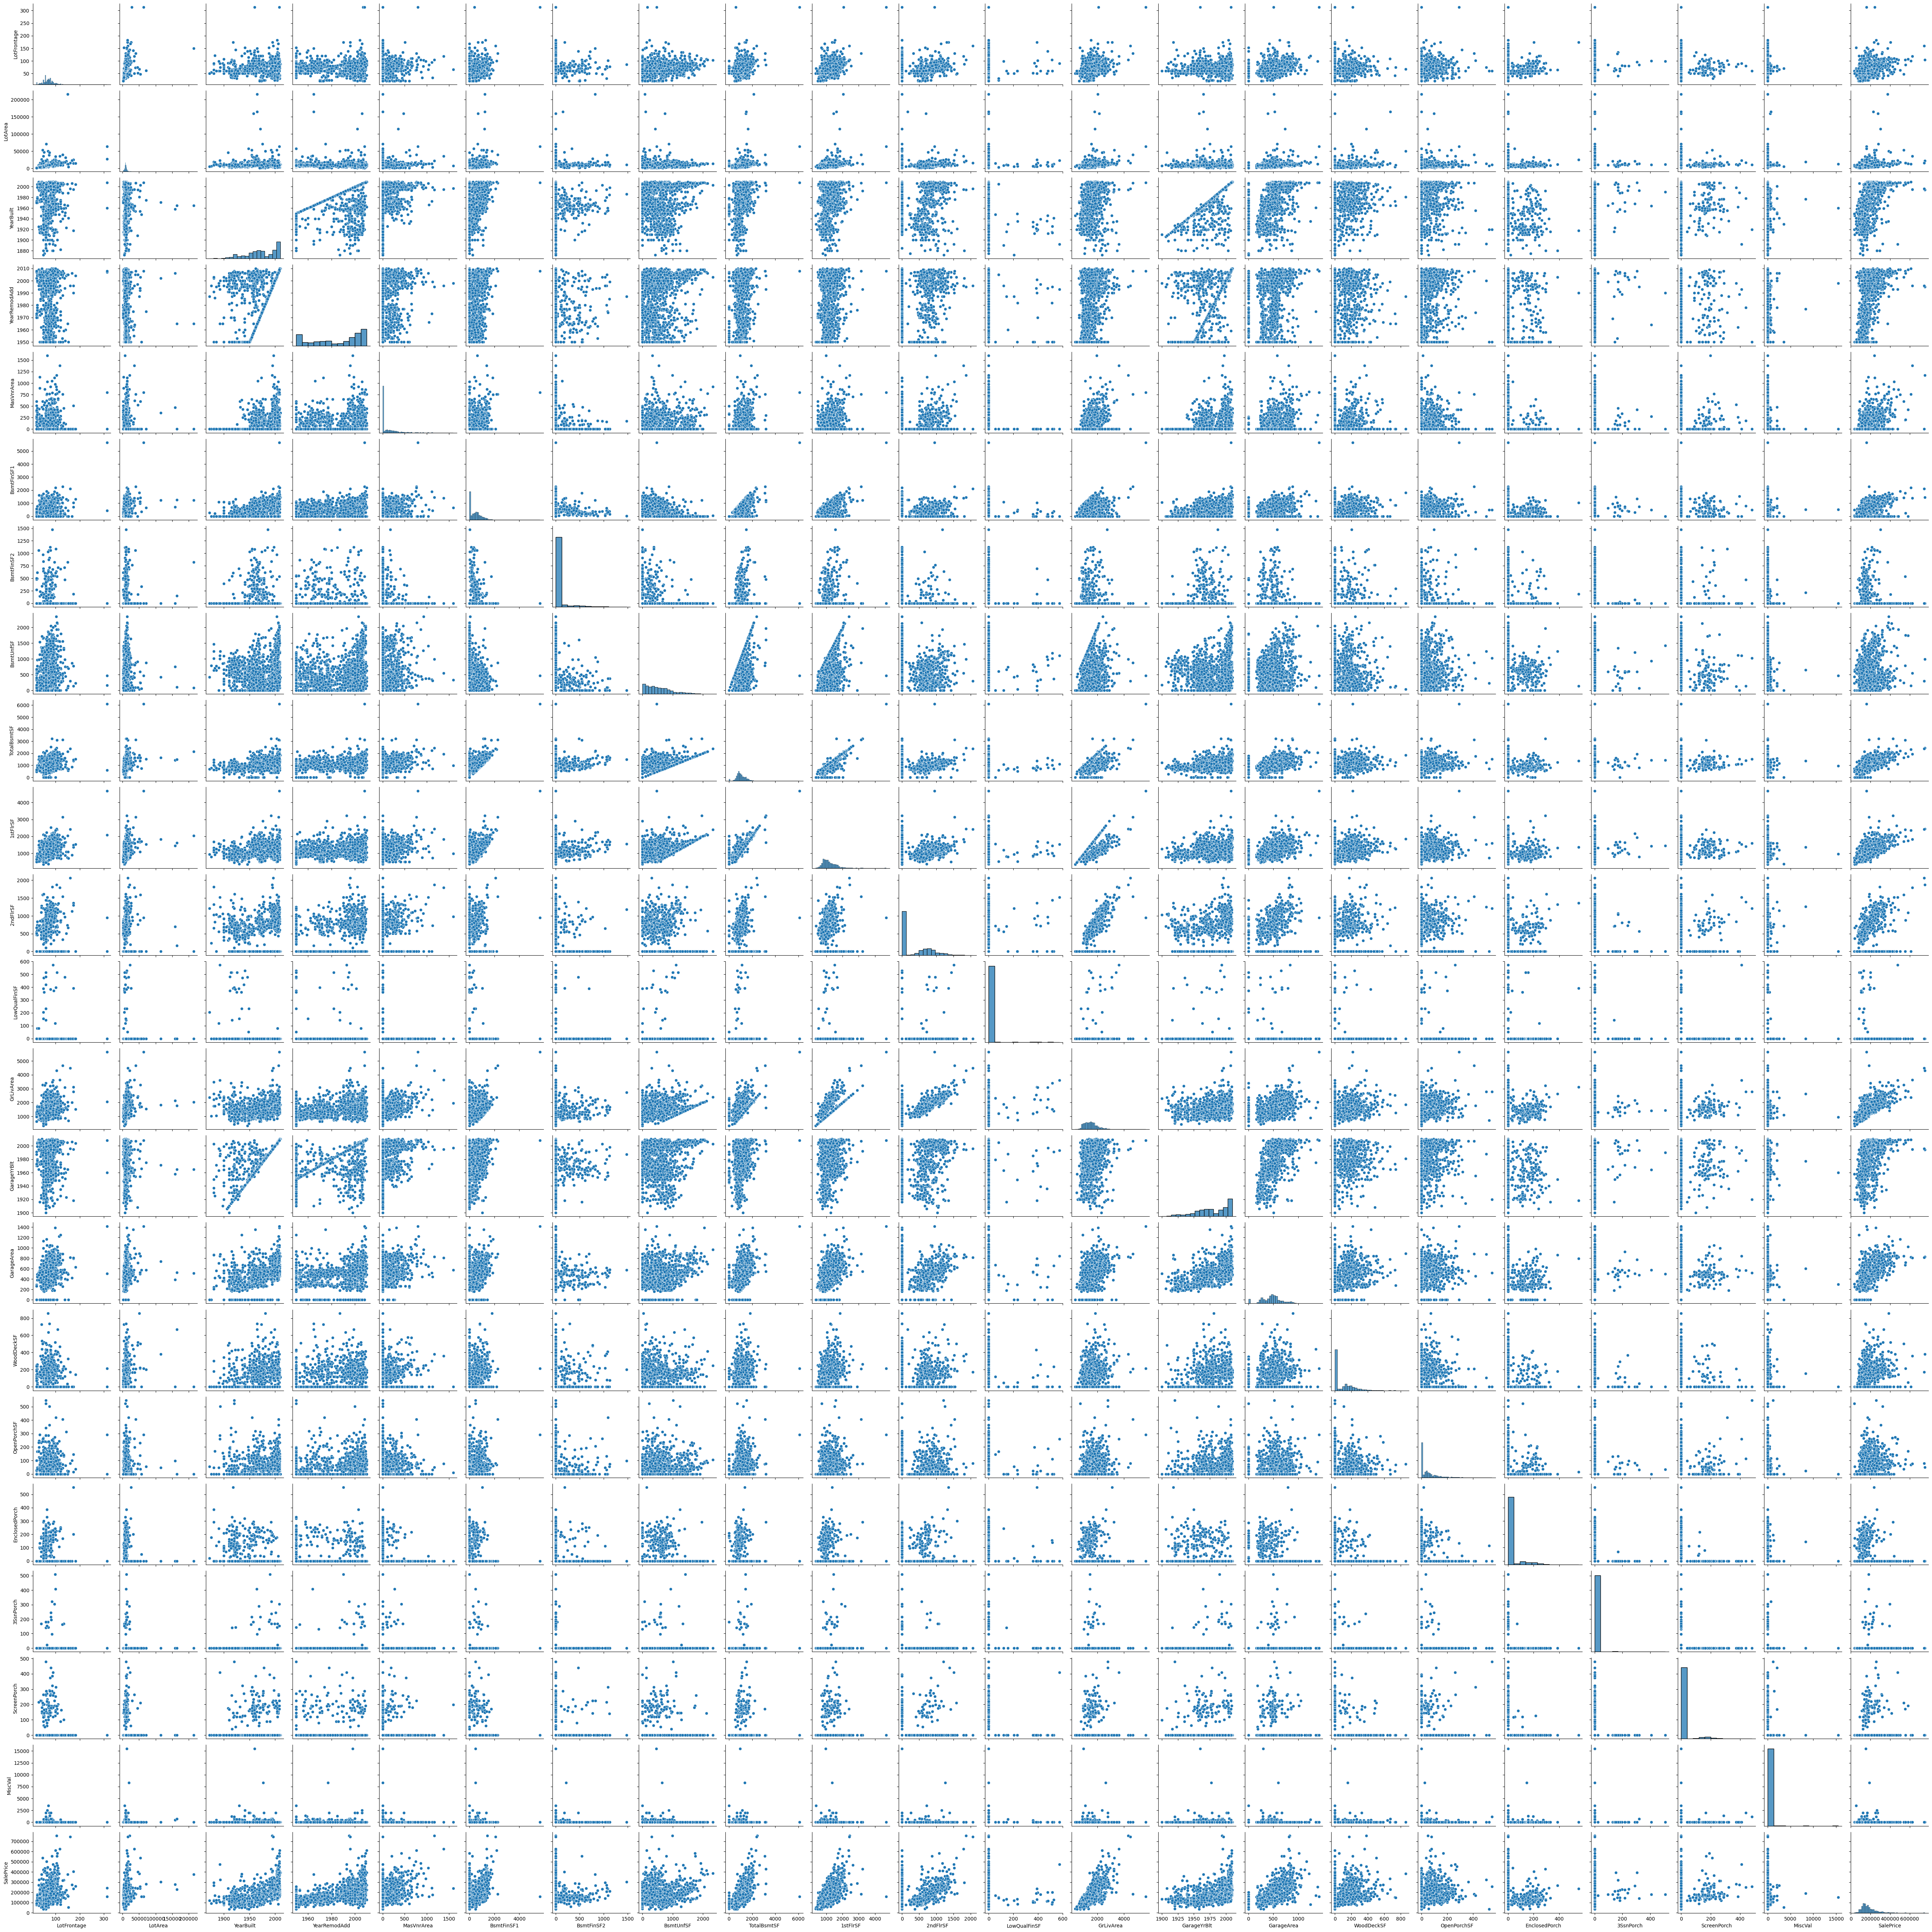

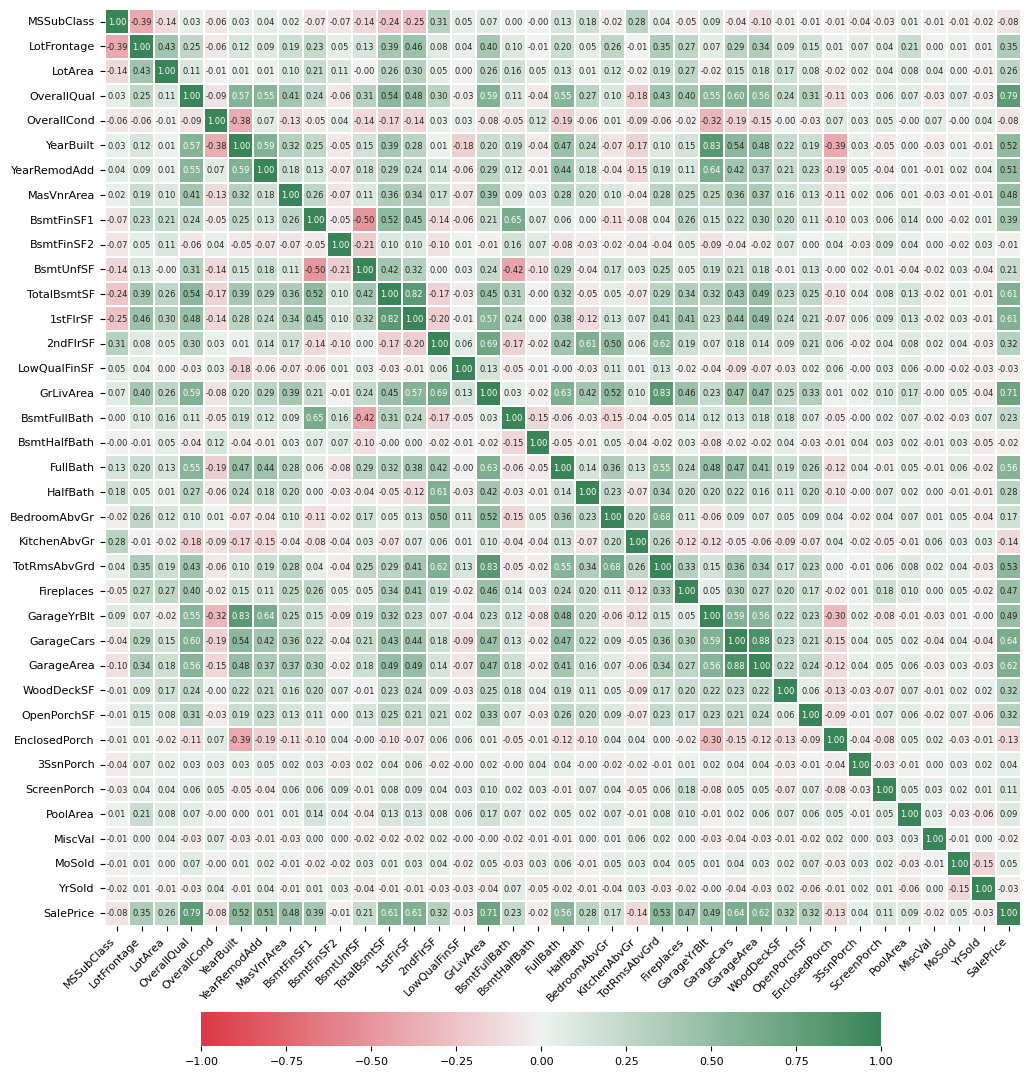

In [550]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [551]:
# There is clearly some multicollinearilty issues. For example, GarageYrBlt is highly correlated with YearBuilt. This is unsurprising,
# since some houses are built with a garage; only a portion have a garage added later. We could drop the GarageYrBlt feature, or change
# it to a differential, for example, the number of years after the initial build that the garage was added.


In [552]:
# Now we create a filtered correlation matrix that only shows features with moderate to strong correlations.
# This doesn't mean all correlations shown are strong, but that features with only weak correlations have been removed for readability.

filtered_corr_matrix = correlation_matrix.copy()
for col in correlation_matrix.columns:
    if ((correlation_matrix[col].abs() <= 0.6).all()) or ((correlation_matrix[col].abs() <= 0.6).sum() == len(correlation_matrix) - 1):
        filtered_corr_matrix.drop(col, axis=1, inplace=True)
        filtered_corr_matrix.drop(col, axis=0, inplace=True)

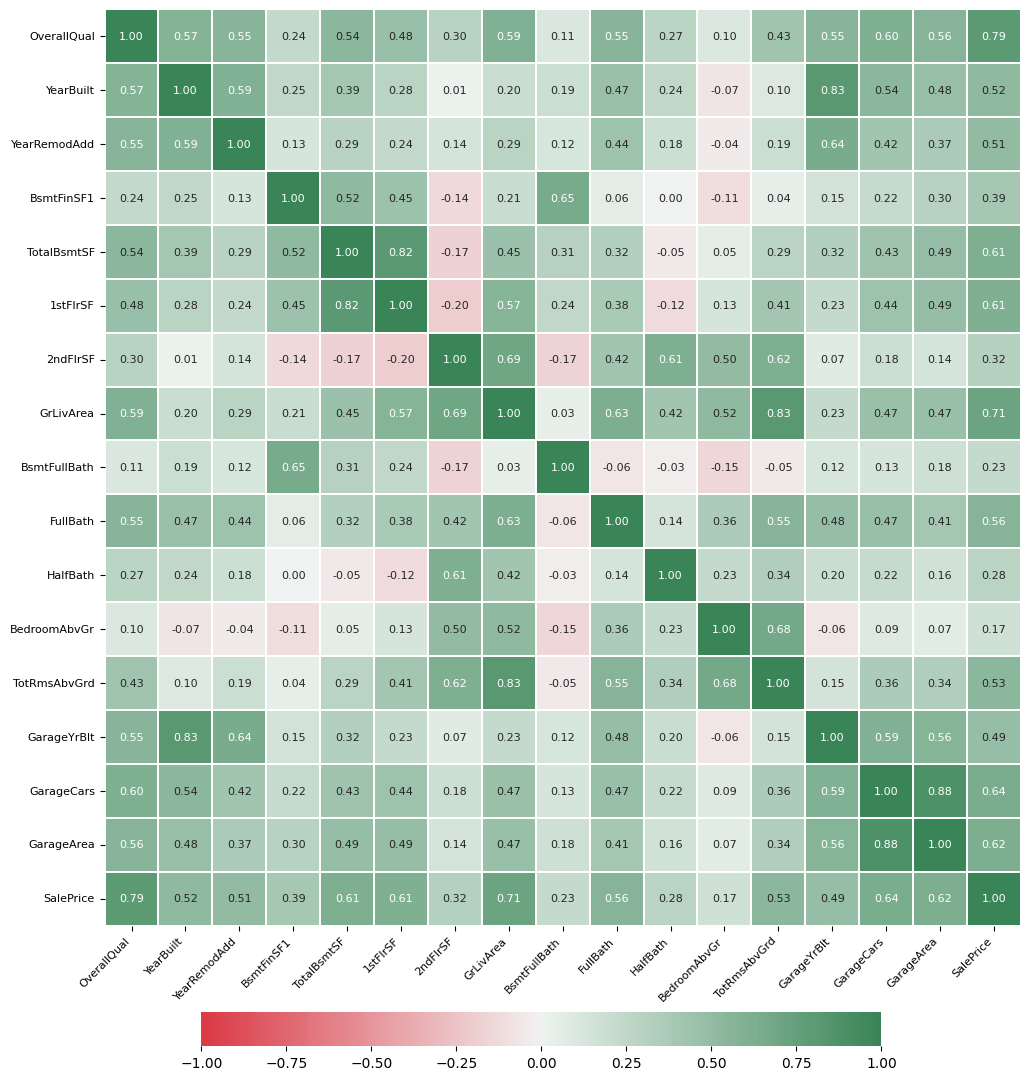

In [553]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
filtered_corr_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 8},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

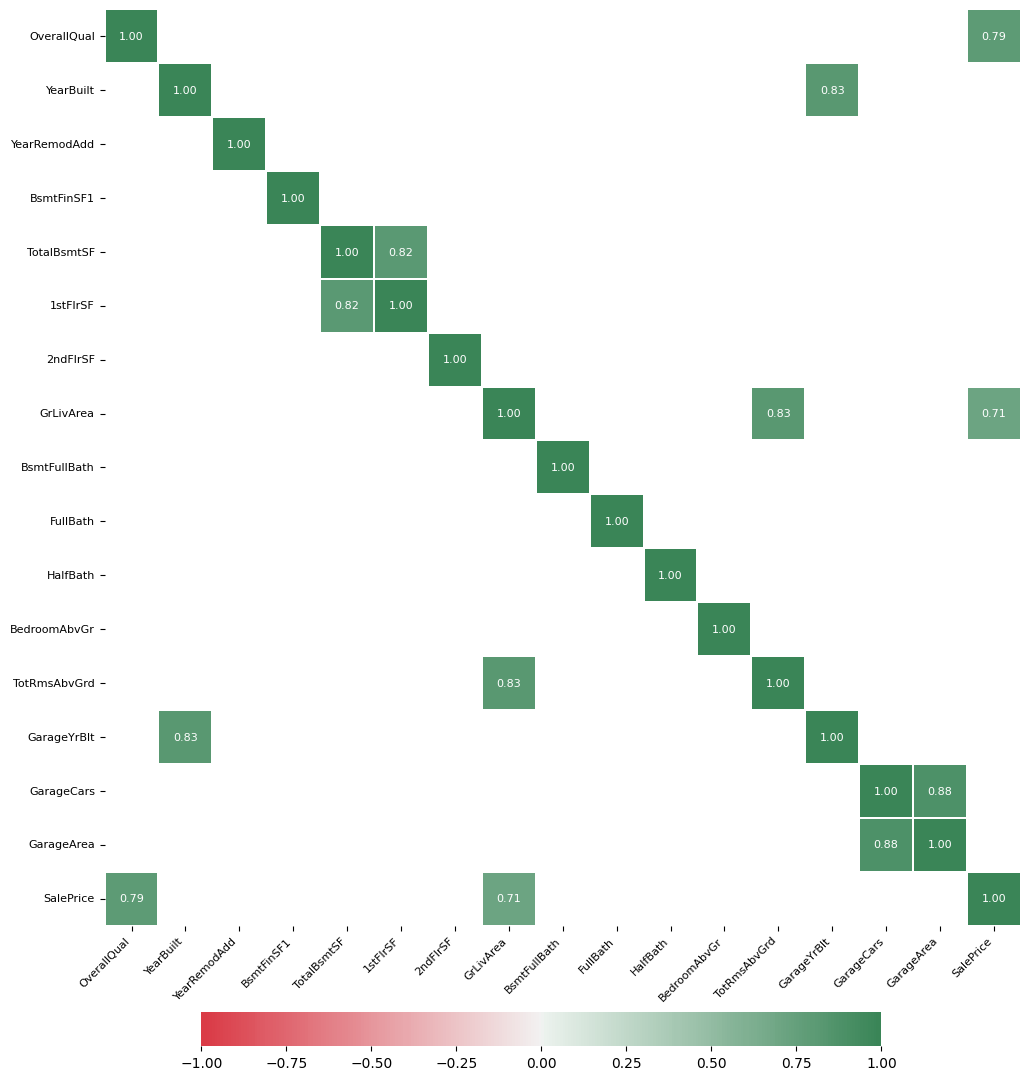

In [554]:
# In addition to the multicollineaity noted with the scatterplot matrix, there are some other features showing high correlation here...


plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
filtered_corr_matrix[filtered_corr_matrix > .7],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 8},  # Set font size for correlation coefficients
    linewidths=.1, # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [555]:
# Correlations noted in the scatterplot matrix:
# BsmtFin SF1 and TotalBsmtSF
# BsmtUnfSF and TotalBsmtSF
# 1stFlrSF and TotalBsmtSF
# 1stFlrSF and GrLivArea
# 2ndFlrSF and GrLivArea

# Additional correlations noted here:
# GarageYrBlt and YearBuilt
# GarageArea and GarageCars
# GrLivArea and TotRmsAbvGround

# We also see features associated with the target feature, sale price. This is important; they are most likely high predictors.
# The other instances of multicollinearity must be handled.

# Multicollinearity Plan:
#1) Convert GarageYrBlt to GarYrsNewer, the number of years newer the garage is than the house
#2) Drop GarageCars. GarageArea will serve as proxy.
#3) Drop TotRmsAbvGrd. GrLivArea is more highly correlated with price and TotRmsAbvGround has some overlap with other room counts.
#4) Drop TotalBsmtSF. This is already expressed in the other basement features. However, we may want to revisit this decision depending
# on model performance and number of features in the final model.
#5) Drop 1stFlSF.

Box Plots

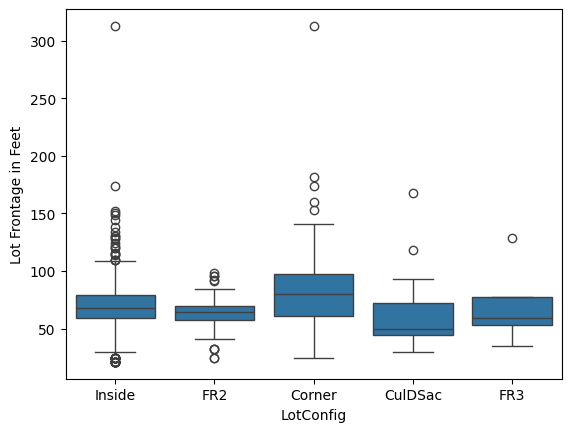

In [557]:
sns.boxplot(x='LotConfig', y='LotFrontage', data=abt)
plt.ylabel('Lot Frontage in Feet')
plt.show()

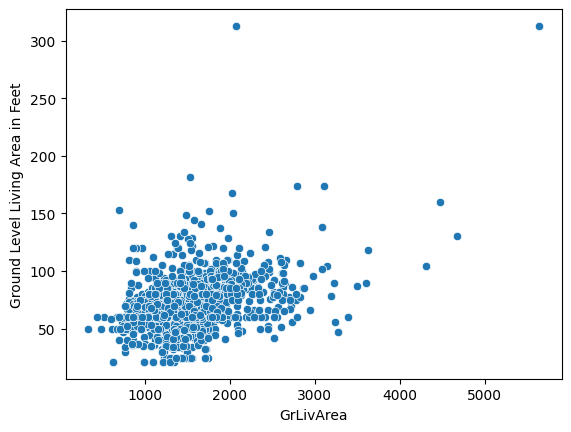

In [558]:
sns.scatterplot(x='GrLivArea', y='LotFrontage', data=abt)
plt.ylabel('Ground Level Living Area in Feet')
plt.show()

In [559]:
# Corner lots have more frontage than others and Culdesacs have the least, on average. However, the ranges overlap, so the difference
# may not be significant.

In [560]:
# Small multiple bar plots for categorical variables (Option for future iteration)

### Step 4: Data Preparation

In [562]:
# To start, let's make a copy of our ABT.
prepped_abt = abt.copy()

#### 4A. Imputation and Calculations

In [564]:
# Our data quality report says the masonry veneer area is missing values. Let's exmine the 0 and null values.
abt[abt['MasVnrArea'] == 0]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1             20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN    NaN         NaN        0       5    2007       WD        Normal     181500
3             70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1          Gd     Detchd       1998.0          Unf           3         642         TA         TA          Y           0           35            272          0            0         0    NaN    NaN         NaN        0       2    2006       WD       Abnorml     140000
5             50       RL         85.0    14115   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin            5            5       1993          1995     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA       Wood       Gd       TA           No          GLQ         732          Unf           0         64          796    GasA        Ex          Y      SBrkr       796       566             0       1362             1             0         1         1             1             1          TA             5        Typ           0         NaN     Attchd       1993.0          Unf           2         480         TA         TA          Y          40           30              0        320            0         0    NaN  MnPrv        Shed      700      10    2009       WD        Normal     143000
8             50       RM         51.0     6120   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin            7            5       1931          1950     Gable  CompShg     BrkFace     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       TA           No          Unf           0          Unf           0        952          952    Gas

In [565]:
abt[abt['MasVnrArea'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
234           60       RL          NaN     7851   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       2002          2002     Gable  CompShg     VinylSd     VinylSd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          GLQ         625          Unf           0        235          860    GasA        Ex          Y      SBrkr       860      1100             0       1960             1             0         2         1             4             1          Gd             8        Typ           2          TA    BuiltIn       2002.0          Fin           2         440         TA         TA          Y         288           48              0          0            0         0    NaN   NaN         NaN        0       5    2010       WD        Normal     216500
529           20       RL          NaN    32668   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm       Norm     1Fam     1Story            6            3       1957          1975       Hip  CompShg     Wd Sdng       Stone        NaN         NaN        Gd        TA      PConc       TA       TA           No          Rec        1219          Unf           0        816         2035    GasA        TA          Y      SBrkr      2515         0             0       2515             1             0         3         0             4             2          TA             9       Maj1           2          TA     Attchd       1975.0          RFn           2         484         TA         TA          Y           0            0            200          0            0         0    NaN   NaN         NaN        0       3    2007       WD        Alloca     200624
650           60       FV         65.0     8125   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     2Story            7            6       2007          2007     Gable  CompShg     CemntBd     CmentBd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        813          813    GasA        Ex          Y      SBrkr       822       843             0       1665             0             0         2         1             3             1          Gd             7        Typ           0         NaN     Attchd       2007.0          RFn           2         562         TA         TA          Y           0            0              0          0            0         0    NaN   NaN         NaN        0       5    2008       WD        Normal     205950
936           20       RL         67.0    10083   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam     1Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          GLQ         833          Unf           0        343         1176    GasA   

In [566]:
# For all null values, the veneer type is also null, so it is likely that there is no veneer. We replace the nulls with zeros:
prepped_abt['MasVnrArea'].fillna(0, inplace=True)

C:\Users\ttesn\AppData\Local\Temp\ipykernel_30488\268391722.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [567]:
prepped_abt[prepped_abt['MasVnrArea'].isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [568]:
# We can see from the lot configuration that there should be lot frontage for at least several of the observations with missing values.
# Given that 18% of observations have missing values in this one feature alone, we don't want to drop the rows. Rather than impute,
# we can drop the column. In this context, LotConfig and GrLivArea together can proxy for LotFrontage; they are likely to have similar 
# predictive value.
abt[abt['LotFrontage'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
7             60       RL          NaN    10382   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story            7            6       1973          1973     Gable  CompShg     HdBoard     HdBoard      Stone       240.0        TA        TA     CBlock       Gd       TA           Mn          ALQ         859          BLQ          32        216         1107    GasA        Ex          Y      SBrkr      1107       983             0       2090             1             0         2         1             3             1          TA             7        Typ           2          TA     Attchd       1973.0          RFn           2         484         TA         TA          Y         235          204            228          0            0         0    NaN    NaN        Shed      350      11    2009       WD        Normal     200000
12            20       RL          NaN    12968   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl       Sawyer       Norm       Norm     1Fam     1Story            5            6       1962          1962       Hip  CompShg     HdBoard     Plywood        NaN         0.0        TA        TA     CBlock       TA       TA           No          ALQ         737          Unf           0        175          912    GasA        TA          Y      SBrkr       912         0             0        912             1             0         1         0             2             1          TA             4        Typ           0         NaN     Detchd       1962.0          Unf           1         352         TA         TA          Y         140            0              0          0          176         0    NaN    NaN         NaN        0       9    2008       WD        Normal     144000
14            20       RL          NaN    10920   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            5       1960          1960       Hip  CompShg     MetalSd     MetalSd    BrkFace       212.0        TA        TA     CBlock       TA       TA           No          BLQ         733          Unf           0        520         1253    GasA        TA          Y      SBrkr      1253         0             0       1253             1             0         1         1             2             1          TA             5        Typ           1          Fa     Attchd       1960.0          RFn           1         352         TA         TA          Y           0          213            176          0            0         0    NaN   GdWo         NaN        0       5    2008       WD        Normal     157000
16            20       RL          NaN    11241   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            7       1970          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA        TA     CBlock       TA       TA           No          ALQ         578          Unf           0        426         1004    Gas

In [569]:
# Converting GarageYrBlt from the year to a difference between the year the home was built and the year the garage was built.
# As a result, the year will be 0 for any homes without garages, rather than a missing value, and there should be no multicollinearity 
# between the new column 'GarYrsNewer' and 'YearBuilt'.

prepped_abt['GarYrsNewer'] = prepped_abt['GarageYrBlt'] - prepped_abt['YearBuilt']

In [570]:
dqr_cat[dqr_cat['% Missing'] > 0]

Feature Count  % Missing Card.                                          Mode Mode Freq. Mode % 2nd Mode 2nd Mode Freq. 2nd Mode %
2          Alley    91  93.767123     2          0    Grvl
Name: Alley, dtype: object        NaN    NaN      NaN            NaN        NaN
17    MasVnrType   588  59.726027     3  0    BrkFace
Name: MasVnrType, dtype: object        NaN    NaN      NaN            NaN        NaN
21      BsmtQual  1423   2.534247     4         0    TA
Name: BsmtQual, dtype: object        NaN    NaN      NaN            NaN        NaN
22      BsmtCond  1423   2.534247     4         0    TA
Name: BsmtCond, dtype: object        NaN    NaN      NaN            NaN        NaN
23  BsmtExposure  1422   2.602740     4     0    No
Name: BsmtExposure, dtype: object        NaN    NaN      NaN            NaN        NaN
24  BsmtFinType1  1423   2.534247     6    0    Unf
Name: BsmtFinType1, dtype: object        NaN    NaN      NaN            NaN        NaN
25  BsmtFinType2  1422   2.602740     6    0    Unf
Name: BsmtFinType2, dtype: object        NaN    NaN      NaN            NaN        NaN
29    Electrical  1459   0.068493     5    0    SBrkr
Name: Electrical, dtype: object        NaN    NaN      NaN            NaN        NaN
32   FireplaceQu   770  47.260274     5      0    Gd
Name: FireplaceQu, dtype: object        NaN    NaN      NaN            NaN        NaN
33    GarageType  1379   5.547945     6   0    Attchd
Name: GarageType, dtype: object        NaN    NaN      NaN            NaN        NaN
34  GarageFinish  1379   5.547945     3    0    Unf
Name: GarageFinish, dtype: object        NaN    NaN      NaN            NaN        NaN
35    GarageQual  1379   5.547945     5       0    TA
Name: GarageQual, dtype: object        NaN    NaN      NaN            NaN        NaN
36    GarageCond  1379   5.547945     5       0    TA
Name: GarageCond, dtype: object        NaN    NaN      NaN            NaN        NaN
38        PoolQC     7  99.520548     3           0    Gd
Name: PoolQC, dtype: object        NaN    NaN      NaN            NaN        NaN
39         Fence   281  80.753425     4         0    MnPrv
Name: Fence, dtype: object        NaN    NaN      NaN            NaN        NaN
40   MiscFeature    54  96.301370     4    0    Shed
Name: MiscFeature, dtype: object        NaN    NaN      NaN            NaN        NaN

In [571]:
# For several categorical features with missing values, we can assume the home does not have the feature if no value is present.
# Thus, we replace the missing value with "None". During encoding, this will receive its own label or column.

cat_col_w_missing = ['Alley', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in cat_col_w_missing:
    prepped_abt[col].fillna('None', inplace=True)

C:\Users\ttesn\AppData\Local\Temp\ipykernel_30488\1434829743.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [572]:
prepped_abt.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  GarYrsNewer
0          60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0        None     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500          0.0
1          20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500          0.0
2          60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500          0.0
3          70       RL         60.0     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf       

#### 4B. Dropping Features

In [574]:
# Dropping features identified earlier with issues of multicollinearity or missing values

prepped_abt.drop(['GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt', 
                 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'LotFrontage'], axis=1, inplace=True)

In [575]:
prepped_abt

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  YrSold SaleType SaleCondition  SalePrice  GarYrsNewer
0             60       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150    GasA        Ex          Y      SBrkr       854             0       1710             1             0         2         1             3             1          Gd        Typ           0        None     Attchd          RFn         548         TA         TA          Y           0           61              0          0            0         0       2    2008       WD        Normal     208500          0.0
1             20       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284    GasA        Ex          Y      SBrkr         0             0       1262             0             1         2         0             3             1          TA        Typ           1          TA     Attchd          RFn         460         TA         TA          Y         298            0              0          0            0         0       5    2007       WD        Normal     181500          0.0
2             60       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434    GasA        Ex          Y      SBrkr       866             0       1786             1             0         2         1             3             1          Gd        Typ           1          TA     Attchd          RFn         608         TA         TA          Y           0           42              0          0            0         0       9    2008       WD        Normal     223500          0.0
3             70       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540    GasA        Gd          Y      SBrkr       756             0       1717             1             0         1         0             3             1          Gd        Typ           1          Gd     Detchd          Unf         642         TA         TA          Y           0           35            272          0            0         0       2    2006       WD       Abnorml     140000         83.0
4             60       RL    14260   Pave     

#### 4C. Encoding

In [577]:
#Depending on the ML package, we may or may not need to encode certain features. We can leave this for the next iteration.

#### 4D. Outlier Handling

In [579]:
# Note: Many of our features are non-normal distributions, so we have to be careful using the IQR.

In [581]:
pd.set_option('display.max_colwidth', None)

In [582]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (1.5 * IQR))) or (value > (Q3 + (1.5 * IQR))):
            outliers.append(value)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})], ignore_index=True)

In [583]:
outliers_df

Feature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Outliers
0      MSSubClass                                                                                                                                                                                [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, ...]
1     LotFrontage                                                                                                           [21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 112.0, 114.0, 114.0, 115.0, 115.0, 116.0, 116.0, 118.0, 118.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 121.0, 121.0, 122.0, 122.0, 124.0, 124.0, 128.0, 129.0, 129.0, 130.0, 130.0, 130.0, 134.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 174.0, 182.0, 313.0, 313.0]
2         LotArea                                                                                                                                                                                                    [1300, 1477, 17755, 17871, 17920, 18000, 18030, 18386, 18450, 18800, 18890, 19138, 19296, 19378, 19690, 19900, 20431, 20544, 20781, 20896, 21000, 21286, 21384, 21453, 21535, 21695, 21750, 21750, 21780, 21872, 21930, 22420, 22950, 23257, 23595, 24090, 24682, 25000, 25095, 25286, 25339, 25419, 26142, 26178, 27650, 28698, 29959, 31770, 32463, 32668, 34650, 35133, 35760, 36500, 39104, 40094, 45600, 46589, 50271, 53107, 53227, 53504, 57200, 63887, 70761, 115149, 159000, 164660, 215245]
3     OverallQual                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [1, 1]
4     OverallCond                                                                                                                                                                                                                                                                                                                                                                                        [1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

Outlier Plan:

MSSubClass - Leave alone; this column is an encoded categorical variable, not a true continuous feature <br>
LotFrontage - TBD; may leave alone; these values may be reasonable for condos and townhome communities <br>
LotArea - Investigate; may be valid for farmhomes <br>
OverallQual - leave alone; 1 is reasonable <br>
OverallCond - leave alone; values are within bounds (1-10) <br>
YearBuilt - remove observations; home age is too extreme to reflect typical conditions and may degrade prediction performance <br>
MasVnrArea - leave alone; values seem reasonable; veneer could be half-wall on front only <br>
BsmtFinSF1 - Investigate; basement size is unreasonably large <br>
BsmtFinSF2 - TBD <br>
BsmtUnfSF - Investigate <br>
TotalBsmtSF - lower end leave alone; upper end needs investigation <br>
1stFlrSF - Investigate; values are high but may be realistic, depending on the region <br>
2ndFlrSF - Investigate; values are high but may be realistic, depending on the region <br>
LowQualFinSF - more context required <br>
GrLivArea - Investigate <br>
BsmtFullBath - Leave alone;  values are within reason <br>
BsmtHalfBath - Leave alone; values are within reason <br>
BedroomAbvGr - Investigate beds > 6 <br>
KitchenAbvGr - Investigate kitchens. Kitchens > 1 should be multi-family dwellings. <br>
TotRmsAbvGrd - Leave alone; values are within reason <br>
Fireplaces - Investigate <br>
GarageArea - Investigate <br>
WoodDeckSF - Typical wooden deck is 300-400 sf, accounding to lawn love. Investigate obs. > 700 sf <br>
OpenPorchSF - Leave alone;  values are within reason <br>
EnclosedPorch - TBD <br>
3SsnPorch - Leave alone;  values are within reason <br>
ScreenPorch - <br>
PoolArea - Leave alone; values are within reason <br>
MiscVal - dropped due to missing values in MiscFeature <br>
SalePrice - Target feature; leave alone. <br>

##### Dropping Rows

In [586]:
# Dropping year outliers
years_to_drop = [1872, 1875, 1880, 1880, 1880, 1880, 1882]
prepped_abt = prepped_abt[~prepped_abt['YearBuilt'].isin(years_to_drop)]

In [587]:
# Although the outliers may be legitamite, it may degrade model performance. Given the small number of outliers in GrLivArea,
# we will drop those rows. This may eliminate outliers in other features as well. For example, BedroomAbvGr outliers are likely 
# the same observations, because a house with more bedrooms also has more living space.

gla_Q1 = abt['GrLivArea'].quantile(0.25)
gla_Q3 = abt['GrLivArea'].quantile(0.75)
gla_IQR = gla_Q3 - gla_Q1

prepped_abt = prepped_abt[(prepped_abt['GrLivArea'] >= (gla_Q1 - 1.5 * gla_IQR)) & 
    (prepped_abt['GrLivArea'] <= (gla_Q3 + 1.5 * gla_IQR))]

In [588]:
prepped_abt.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  YrSold SaleType SaleCondition  SalePrice  GarYrsNewer
0          60       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150    GasA        Ex          Y      SBrkr       854             0       1710             1             0         2         1             3             1          Gd        Typ           0        None     Attchd          RFn         548         TA         TA          Y           0           61              0          0            0         0       2    2008       WD        Normal     208500          0.0
1          20       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284    GasA        Ex          Y      SBrkr         0             0       1262             0             1         2         0             3             1          TA        Typ           1          TA     Attchd          RFn         460         TA         TA          Y         298            0              0          0            0         0       5    2007       WD        Normal     181500          0.0
2          60       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434    GasA        Ex          Y      SBrkr       866             0       1786             1             0         2         1             3             1          Gd        Typ           1          TA     Attchd          RFn         608         TA         TA          Y           0           42              0          0            0         0       9    2008       WD        Normal     223500          0.0
3          70       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540    GasA        Gd          Y      SBrkr       756             0       1717             1             0         1         0             3             1          Gd        Typ           1          Gd     Detchd          Unf         642         TA         TA          Y           0           35            272          0            0         0       2    2006       WD       Abnorml     140000         83.0
4          60       RL    14260   Pave      IR1         Lv

In [605]:
# Redefine continuous columns now that features have been dropped.
prepped_categorical_cols = []
prepped_continuous_cols = []

for col in prepped_abt.columns:
    if pd.api.types.is_numeric_dtype(prepped_abt[col]):
        prepped_continuous_cols.append(col)
    else:
        prepped_categorical_cols.append(col)

if 'GarYrsNewer' in prepped_continuous_cols:
    prepped_continuous_cols.remove('GarYrsNewer')

#### 4E. Transformations

In [ ]:
# Depending on the ML algorythms used, some features may need to be transformed.
# Transformations will be included in the next iteration. 
# Possible transformations:
# Normalization 
# Standardizations
# Clamp Transformation